In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
region_df = pd.read_parquet("/home2/s5549329/windAI_rug/WindAi/deep_learning/created_datasets/NO1.parquet")


In [3]:
region_df.head()

,time,ws10m_mean,ws10m_std,ws10m_min,ws10m_max,ws10m_median,wd10m_mean,wd10m_std,t2m_mean,t2m_std,...,g10m_min,g10m_max,g10m_median,t2m_now,mslp_now,rh2m_now,precip_now,ws10m_now,wd10m_now,power_MW
0,2020-02-15 13:00:00,3.358135,0.378822,2.528628,3.944004,3.381606,218.737854,5.881298,276.304744,0.411686,...,6.610214,10.065765,8.312314,276.314178,100598.023438,0.852978,0.000617,3.711130,217.242477,44.666173
1,2020-02-15 14:00:00,3.122371,0.452259,2.213586,3.806700,3.179706,206.377744,6.159813,275.975155,0.384912,...,6.819106,9.664303,8.236144,275.946930,100593.210938,0.884543,0.000181,3.483180,207.492844,65.059451
2,2020-02-15 15:00:00,2.897094,0.368524,2.305263,3.576687,2.869734,191.991542,6.705309,275.442468,0.356906,...,6.404898,8.942446,7.545419,275.529144,100512.468750,0.918824,0.000038,2.808272,196.660522,86.562093
3,2020-02-15 16:00:00,3.035758,0.494459,2.356229,4.084036,2.919914,183.047741,6.086777,274.831068,0.454263,...,6.395423,9.603404,7.470071,274.937225,100429.398438,0.980287,0.004540,2.647012,183.282181,77.712180
4,2020-02-15 17:00:00,3.431322,0.471104,2.703051,4.202367,3.356429,173.668963,8.975834,274.699112,0.596259,...,6.809601,10.086508,8.064340,274.975311,100349.312500,0.992305,0.000152,3.103675,173.968979,96.571011


In [4]:
region_df.columns

Index(['time', 'ws10m_mean', 'ws10m_std', 'ws10m_min', 'ws10m_max',
       'ws10m_median', 'wd10m_mean', 'wd10m_std', 't2m_mean', 't2m_std',
       't2m_min', 't2m_max', 't2m_median', 'rh2m_mean', 'rh2m_std', 'rh2m_min',
       'rh2m_max', 'rh2m_median', 'mslp_mean', 'mslp_std', 'mslp_min',
       'mslp_max', 'mslp_median', 'g10m_mean', 'g10m_std', 'g10m_min',
       'g10m_max', 'g10m_median', 't2m_now', 'mslp_now', 'rh2m_now',
       'precip_now', 'ws10m_now', 'wd10m_now', 'power_MW'],
      dtype='object')

In [5]:
region_df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
time,44535,2022-09-02 01:46:00.444594176,2020-02-15 13:00:00,2021-05-24 10:30:00,2022-09-01 22:00:00,2023-12-10 05:30:00,2025-03-27 01:00:00,NaN
ws10m_mean,44535.0,2.585237,0.490201,1.667938,2.344294,3.252934,9.586797,1.228684
ws10m_std,44535.0,0.544562,0.100943,0.391442,0.506542,0.65695,2.15182,0.210001
ws10m_min,44535.0,1.666435,0.128467,0.883609,1.430867,2.215189,7.871237,1.043867
ws10m_max,44535.0,3.59531,0.883776,2.49178,3.350553,4.423423,11.584646,1.462965
ws10m_median,44535.0,2.56954,0.454817,1.645154,2.32748,3.238983,9.554408,1.236734
wd10m_mean,44535.0,184.738214,5.176131,125.450079,192.696562,235.69236,356.959215,80.654476
wd10m_std,44535.0,35.302344,1.977233,10.935712,21.703867,52.28899,167.208495,32.26825
t2m_mean,44535.0,277.88232,253.590058,271.796921,277.098682,284.550748,301.270083,8.350162
t2m_std,44535.0,0.787328,0.193363,0.544399,0.715799,0.947601,3.749734,0.349659


In [57]:
region_df.isnull().sum()

time          0
ws10m_mean    0
ws10m_std     0
wd10m_mean    0
wd10m_std     0
t2m_mean      0
t2m_std       0
rh2m_mean     0
rh2m_std      0
mslp_mean     0
mslp_std      0
g10m_mean     0
g10m_std      0
t2m_now       0
mslp_now      0
rh2m_now      0
precip_now    0
ws10m_now     0
wd10m_now     0
power_MW      2
dtype: int64

(np.float64(-9.052300453186035),
 np.float64(7.665624618530273),
 np.float64(-8.261500358581543),
 np.float64(7.158315658569336))

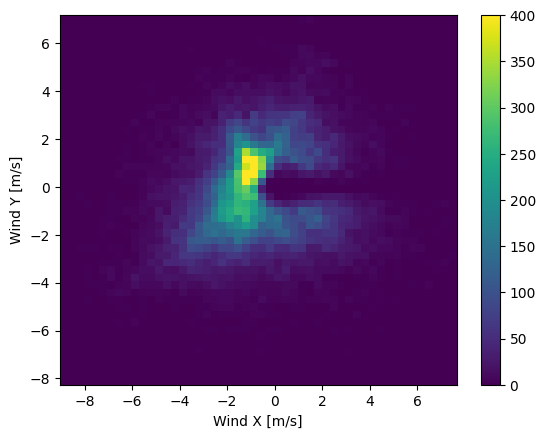

In [9]:
wv =  region_df.pop("ws10m_now")

wd_rad = region_df.pop("wd10m_now")*np.pi / 180

region_df['Wx_now'] = wv*np.cos(wd_rad)
region_df['Wy_now'] = wv*np.sin(wd_rad)

plt.hist2d(region_df['Wx_now'], region_df['Wy_now'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

(np.float64(-8.542860826535202),
 np.float64(7.610044769646453),
 np.float64(-6.930579256141158),
 np.float64(6.399744641239457))

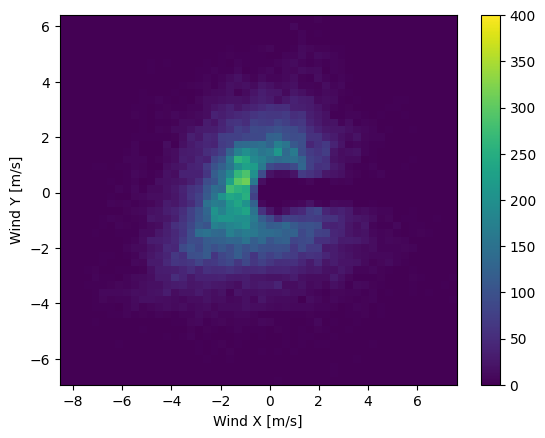

In [8]:
wv =  region_df.pop("ws10m_mean")

wd_rad = region_df.pop("wd10m_mean")*np.pi / 180

region_df['Wx_mean'] = wv*np.cos(wd_rad)
region_df['Wy_mean'] = wv*np.sin(wd_rad)

plt.hist2d(region_df['Wx_mean'], region_df['Wy_mean'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

(np.float64(-1.061582106984055),
 np.float64(1.970011276471224),
 np.float64(0.005828420140596503),
 np.float64(1.8249802341288757))

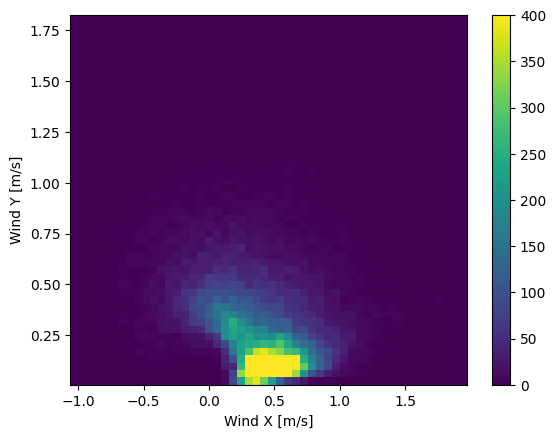

In [10]:
wv =  region_df.pop("ws10m_std")

wd_rad = region_df.pop("wd10m_std")*np.pi / 180

region_df['Wx_std'] = wv*np.cos(wd_rad)
region_df['Wy_std'] = wv*np.sin(wd_rad)

plt.hist2d(region_df['Wx_std'], region_df['Wy_std'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

In [63]:
region_df.shape

(44535, 20)

In [64]:
region_df = region_df.dropna(subset=['power_MW'])

In [13]:
region_df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
time,44535,2022-09-02 01:46:00.444594176,2020-02-15 13:00:00,2021-05-24 10:30:00,2022-09-01 22:00:00,2023-12-10 05:30:00,2025-03-27 01:00:00,NaN
ws10m_min,44535.0,1.666435,0.128467,0.883609,1.430867,2.215189,7.871237,1.043867
ws10m_max,44535.0,3.59531,0.883776,2.49178,3.350553,4.423423,11.584646,1.462965
ws10m_median,44535.0,2.56954,0.454817,1.645154,2.32748,3.238983,9.554408,1.236734
t2m_mean,44535.0,277.88232,253.590058,271.796921,277.098682,284.550748,301.270083,8.350162
t2m_std,44535.0,0.787328,0.193363,0.544399,0.715799,0.947601,3.749734,0.349659
t2m_min,44535.0,276.441379,252.173608,270.597227,275.755675,283.062959,300.055988,8.244724
t2m_max,44535.0,279.200951,255.085308,272.872911,278.334364,285.888993,302.601092,8.366625
t2m_median,44535.0,277.906677,253.564757,271.806948,277.110964,284.571938,301.245245,8.376549
rh2m_mean,44535.0,0.801051,0.196691,0.69833,0.845578,0.945244,1.000007,0.171286


In [11]:
region_df["time"] = pd.to_datetime(region_df['time'])

In [12]:
scaler = StandardScaler()
features = region_df.drop(columns=["power_MW"])
features = features.select_dtypes(include=["number"])
features_scaled = scaler.fit_transform(features)

target = region_df["power_MW"].values
features_scaled.shape

(44535, 33)

In [14]:
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=region_df.index)

region_sample_scaled = pd.concat([features_scaled_df, region_df["power_MW"]], axis=1)
region_sample_scaled.head(6)

,ws10m_min,ws10m_max,ws10m_median,t2m_mean,t2m_std,t2m_min,t2m_max,t2m_median,rh2m_mean,rh2m_std,...,mslp_now,rh2m_now,precip_now,Wx_mean,Wy_mean,Wx_now,Wy_now,Wx_std,Wy_std,power_MW
0,0.825970,0.238350,0.656629,-0.188930,-1.074319,-0.109369,-0.264777,-0.183352,0.241932,0.162889,...,-0.502874,0.270299,-0.319728,-0.922052,-0.975985,-1.053430,-1.054335,-0.070602,-1.079057,44.666173
1,0.524164,0.144496,0.493374,-0.228401,-1.150894,-0.134176,-0.306336,-0.232382,0.388981,0.299192,...,-0.506869,0.457704,-0.321242,-1.012516,-0.600443,-1.122256,-0.722678,0.181091,-1.028976,65.059451
2,0.611989,-0.012730,0.242734,-0.292195,-1.230990,-0.191285,-0.385099,-0.290531,0.645571,0.278649,...,-0.573897,0.661231,-0.321737,-1.031126,-0.187481,-0.919301,-0.305313,-0.108020,-1.057332,86.562093
3,0.660814,0.334070,0.283309,-0.365416,-0.952550,-0.303003,-0.431938,-0.360303,0.920896,-0.280537,...,-0.642858,1.026138,-0.306114,-1.131613,0.044168,-0.895059,0.034461,0.326345,-1.008855,77.712180
4,0.993065,0.414954,0.636271,-0.381219,-0.546450,-0.379693,-0.429769,-0.364380,1.040074,-0.805557,...,-0.709341,1.097493,-0.321344,-1.324325,0.328020,-1.120568,0.282771,0.235315,-0.900191,96.571011
5,1.251177,0.797939,1.027754,-0.361738,-0.448142,-0.381517,-0.417105,-0.351713,1.080570,-1.001320,...,-0.810263,1.126058,-0.319012,-1.497333,0.609276,-1.340716,0.643443,0.271298,-0.930357,133.625789


In [15]:
timestamp_s = region_df["time"].map(pd.Timestamp.timestamp)
timestamp_s.head()

0    1.581772e+09
1    1.581775e+09
2    1.581779e+09
3    1.581782e+09
4    1.581786e+09
Name: time, dtype: float64

In [16]:
day = 24*60*60
year = (365.2425)*day

region_sample_scaled['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
region_sample_scaled['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
region_sample_scaled['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
region_sample_scaled['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))
region_sample_scaled.head(6)

,ws10m_min,ws10m_max,ws10m_median,t2m_mean,t2m_std,t2m_min,t2m_max,t2m_median,rh2m_mean,rh2m_std,...,Wy_mean,Wx_now,Wy_now,Wx_std,Wy_std,power_MW,Day sin,Day cos,Year sin,Year cos
0,0.825970,0.238350,0.656629,-0.188930,-1.074319,-0.109369,-0.264777,-0.183352,0.241932,0.162889,...,-0.975985,-1.053430,-1.054335,-0.070602,-1.079057,44.666173,-0.258819,-9.659258e-01,0.704198,0.710004
1,0.524164,0.144496,0.493374,-0.228401,-1.150894,-0.134176,-0.306336,-0.232382,0.388981,0.299192,...,-0.600443,-1.122256,-0.722678,0.181091,-1.028976,65.059451,-0.500000,-8.660254e-01,0.704707,0.709499
2,0.611989,-0.012730,0.242734,-0.292195,-1.230990,-0.191285,-0.385099,-0.290531,0.645571,0.278649,...,-0.187481,-0.919301,-0.305313,-0.108020,-1.057332,86.562093,-0.707107,-7.071068e-01,0.705215,0.708994
3,0.660814,0.334070,0.283309,-0.365416,-0.952550,-0.303003,-0.431938,-0.360303,0.920896,-0.280537,...,0.044168,-0.895059,0.034461,0.326345,-1.008855,77.712180,-0.866025,-5.000000e-01,0.705723,0.708488
4,0.993065,0.414954,0.636271,-0.381219,-0.546450,-0.379693,-0.429769,-0.364380,1.040074,-0.805557,...,0.328020,-1.120568,0.282771,0.235315,-0.900191,96.571011,-0.965926,-2.588190e-01,0.706231,0.707982
5,1.251177,0.797939,1.027754,-0.361738,-0.448142,-0.381517,-0.417105,-0.351713,1.080570,-1.001320,...,0.609276,-1.340716,0.643443,0.271298,-0.930357,133.625789,-1.000000,-1.110103e-11,0.706738,0.707475


In [17]:
print(f"Total numeric features in dataset: {region_sample_scaled.select_dtypes(include=np.number).shape[1]}")

Total numeric features in dataset: 38


In [19]:
corr = region_sample_scaled.corr()
top_corr = corr["power_MW"].abs().sort_values(ascending=False).head(32)  # includes power_MW
top_features = top_corr.index.tolist()

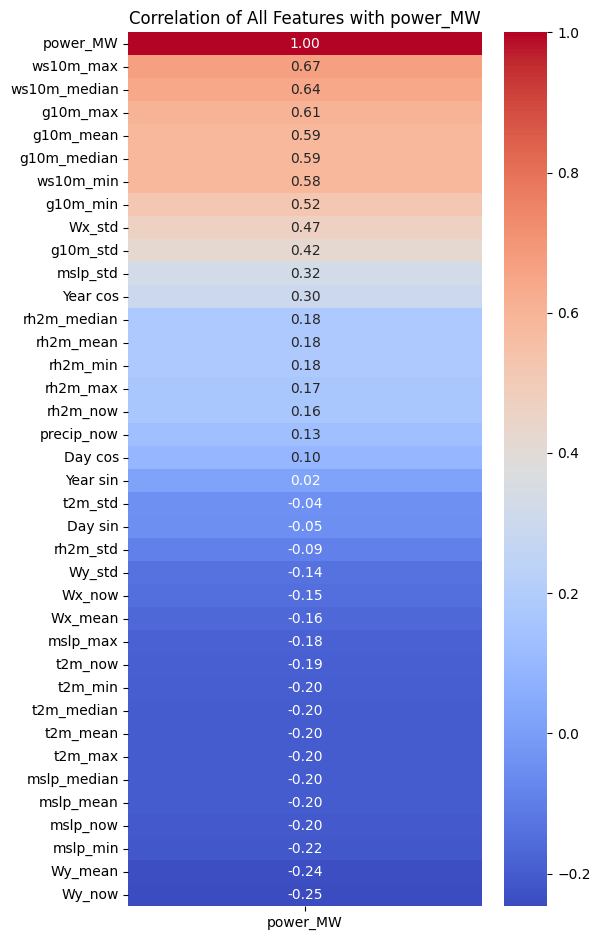

In [20]:
plt.figure(figsize=(6, len(region_sample_scaled.columns) * 0.25))  # auto-size by number of features
sns.heatmap(region_sample_scaled.corr()[["power_MW"]].sort_values(by="power_MW", ascending=False),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of All Features with power_MW")
plt.tight_layout()
plt.savefig("all_feature_correlations_with_power_MW.png", dpi=300, bbox_inches="tight")
plt.show()


In [21]:
scaled_df_1 = pd.read_parquet("/home2/s5549329/windAI_rug/WindAi/deep_learning/created_datasets/scaled_features_power_MW_scaled_features_power_MW_NO1.parquet")
scaled_df_1.head()

,time,ws10m_min,ws10m_max,ws10m_median,t2m_mean,t2m_std,t2m_min,t2m_max,t2m_median,rh2m_mean,...,power_MW_lag3,power_MW_lag4,power_MW_lag5,power_MW_lag6,power_MW_lag7,Day sin,Day cos,Year sin,Year cos,power_MW
0,2020-02-16 03:00:00,5.943268,4.204488,5.023796,0.000144,-1.117794,0.071964,-0.079950,0.008408,1.058365,...,0.607694,0.651954,0.659410,0.635750,0.588984,0.707107,7.071068e-01,0.711287,0.702902,0.482688
1,2020-02-16 04:00:00,5.770356,4.256786,5.029968,0.026404,-1.137749,0.107500,-0.067851,0.034373,1.088162,...,0.590384,0.607799,0.652051,0.659509,0.635853,0.866025,5.000000e-01,0.711791,0.702392,0.545481
2,2020-02-16 05:00:00,5.418750,4.053928,4.690209,0.041645,-1.215978,0.134341,-0.049613,0.043621,1.035660,...,0.558296,0.590488,0.607893,0.652150,0.659614,0.965926,2.588190e-01,0.712294,0.701881,0.531523
3,2020-02-16 06:00:00,4.821756,3.751968,4.234378,0.030576,-0.903368,0.104115,-0.038938,0.034888,0.954040,...,0.483043,0.558397,0.590581,0.607989,0.652254,1.000000,1.675808e-12,0.712797,0.701370,0.516968
4,2020-02-16 07:00:00,3.422189,3.226245,3.615362,-0.011382,-0.224755,0.014153,-0.037021,-0.010823,0.897761,...,0.545858,0.483137,0.558487,0.590675,0.608089,0.965926,-2.588190e-01,0.713300,0.700859,0.512973


In [22]:
scaled_df_1.transpose().describe()

,0,1,2,3,4,5,6,7,8,9,...,44495,44496,44497,44498,44499,44500,44501,44502,44503,44504
count,46,46,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46
unique,46,46,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46
top,2020-02-16 03:00:00,2020-02-16 04:00:00,2020-02-16 05:00:00,2020-02-16 06:00:00,2020-02-16 07:00:00,2020-02-16 08:00:00,2020-02-16 09:00:00,2020-02-16 10:00:00,2020-02-16 11:00:00,2020-02-16 12:00:00,...,2025-03-26 16:00:00,2025-03-26 17:00:00,2025-03-26 18:00:00,2025-03-26 19:00:00,2025-03-26 20:00:00,2025-03-26 21:00:00,2025-03-26 22:00:00,2025-03-26 23:00:00,2025-03-27 00:00:00,2025-03-27 01:00:00
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [23]:
scaled_df_1.shape

(44505, 46)

In [26]:
scaled_df_2 = pd.read_parquet("/home2/s5549329/windAI_rug/WindAi/deep_learning/created_datasets/scaled_features_power_MW_NO2.parquet")
scaled_df_2.columns

Index(['time', 'ws10m_min', 'ws10m_max', 'ws10m_median', 't2m_mean', 't2m_std',
       't2m_min', 't2m_max', 't2m_median', 'rh2m_mean', 'rh2m_std', 'rh2m_min',
       'rh2m_max', 'rh2m_median', 'mslp_mean', 'mslp_std', 'mslp_min',
       'mslp_max', 'mslp_median', 'g10m_mean', 'g10m_std', 'g10m_min',
       'g10m_max', 'g10m_median', 't2m_now', 'mslp_now', 'rh2m_now',
       'precip_now', 'Wx_mean', 'Wy_mean', 'Wx_std', 'Wy_std', 'Wx_now',
       'Wy_now', 'power_MW_lag1', 'power_MW_lag2', 'power_MW_lag3',
       'power_MW_lag4', 'power_MW_lag5', 'power_MW_lag6', 'power_MW_lag7',
       'Day sin', 'Day cos', 'Year sin', 'Year cos', 'power_MW'],
      dtype='object')

In [27]:
scaled_df_2.shape

(44520, 46)